<a href="https://colab.research.google.com/github/arpit1532000/amazon-sales-analysis/blob/main/IS_Amazon_sales_report_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ds = pd.read_csv('/content/Amazon Sale Report.csv')

In [ ]:
ds.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN


In [ ]:
ds.tail(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [ ]:
ds.shape

(128976, 21)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
ds.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [ ]:
ds.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

<Axes: >

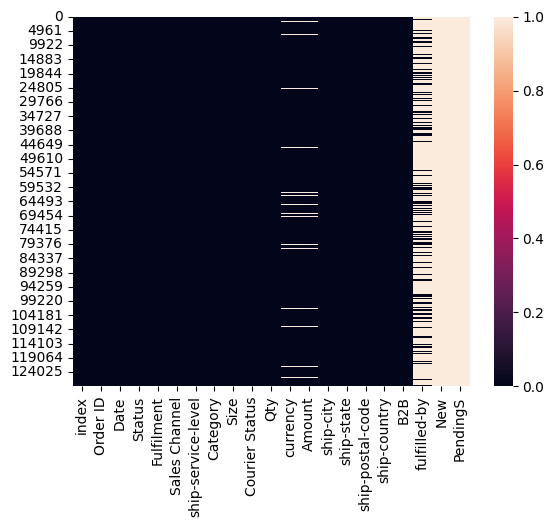

In [ ]:
sns.heatmap(ds.isnull())

In [ ]:
ds['Amount'].fillna(ds['Amount'].mean(),inplace=True)

In [ ]:
ds['currency'].unique()

array(['INR', nan], dtype=object)

In [ ]:
ds['ship-city'].fillna(ds['ship-city'].mode()[0],inplace=True)

In [ ]:
ds['ship-state'].fillna(ds['ship-state'].mode()[0],inplace=True)

In [ ]:
ds['ship-postal-code'].fillna(ds['ship-postal-code'].mode()[0],inplace=True)

In [ ]:
ds['ship-country'].fillna(ds['ship-country'].mode()[0],inplace=True)

In [ ]:
ds['currency'].fillna(ds['currency'].mode()[0],inplace=True)

In [ ]:
ds['fulfilled-by'].fillna('others', inplace=True)

In [ ]:
ds['Date'] = pd.to_datetime(ds['Date'])

<ipython-input-20-89134adf55ff>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Date'] = pd.to_datetime(ds['Date'])


In [ ]:
ds.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object

In [ ]:
ds.isnull().sum()/len(ds)*100

index                   0.0
Order ID                0.0
Date                    0.0
Status                  0.0
Fulfilment              0.0
Sales Channel           0.0
ship-service-level      0.0
Category                0.0
Size                    0.0
Courier Status          0.0
Qty                     0.0
currency                0.0
Amount                  0.0
ship-city               0.0
ship-state              0.0
ship-postal-code        0.0
ship-country            0.0
B2B                     0.0
fulfilled-by            0.0
New                   100.0
PendingS              100.0
dtype: float64

In [ ]:
ds.drop(columns=['New', 'PendingS'], inplace=True)

In [ ]:
ds.drop(columns=['index'], inplace=True)

In [ ]:
ds.drop_duplicates(inplace=True)

In [ ]:
ds.shape

(128017, 18)

In [ ]:
ds.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,others
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,others


In [ ]:
for column in ds.columns:
    unique_values = ds[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)

Unique values in Order ID:
['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']
Unique values in Date:
<DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022-04-28 00:00:00',
 '2022-04-27 00:00:00', '2022-04-26 00:00:00', '2022-04-25 00:00:00',
 '2022-04-24 00:00:00', '2022-04-23 00:00:00', '2022-04-22 00:00:00',
 '2022-04-21 00:00:00', '2022-04-20 00:00:00', '2022-04-19 00:00:00',
 '2022-04-18 00:00:00', '2022-04-17 00:00:00', '2022-04-16 00:00:00',
 '2022-04-15 00:00:00', '2022-04-14 00:00:00', '2022-04-13 00:00:00',
 '2022-04-12 00:00:00', '2022-04-11 00:00:00', '2022-04-10 00:00:00',
 '2022-04-09 00:00:00', '2022-04-08 00:00:00', '2022-04-07 00:00:00',
 '2022-04-06 00:00:00', '2022-04-05 00:00:00', '2022-04-04 00:00:00',
 '2022-04-03 00:00:00', '2022-04-02 00:00:00', '2022-04-01 00:00:00',
 '2022-03-31 00:00:00', '2022-05-31 00:00:00', '2022-05-30 00:00:00',
 '2022-05-29 00:00:00', '

In [ ]:
# ds.to_csv('cleaned_data.csv', index=False)

Now the visualization Part

Top category has max Quantity

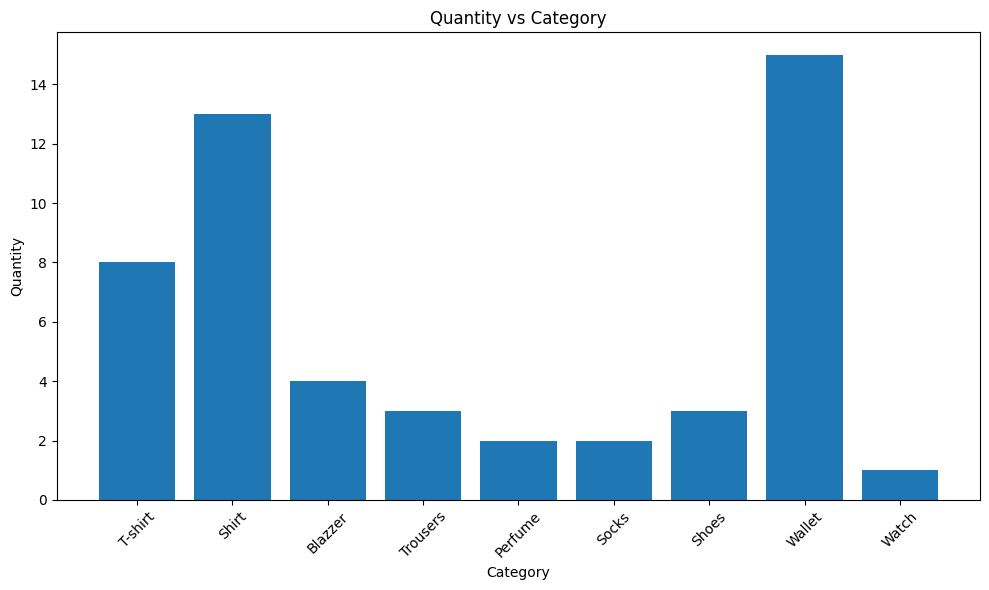

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ds['Category'], ds['Qty'])
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity vs Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Sales Overview

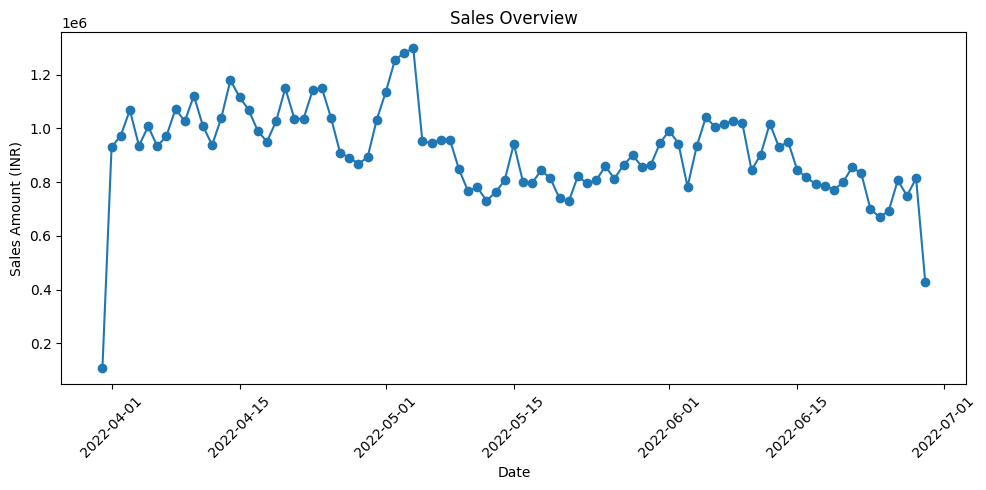

In [ ]:
sales_overview = ds.groupby('Date')['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sales_overview['Date'], sales_overview['Amount'], marker='o')
plt.title('Sales Overview')
plt.xlabel('Date')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Product Analysis

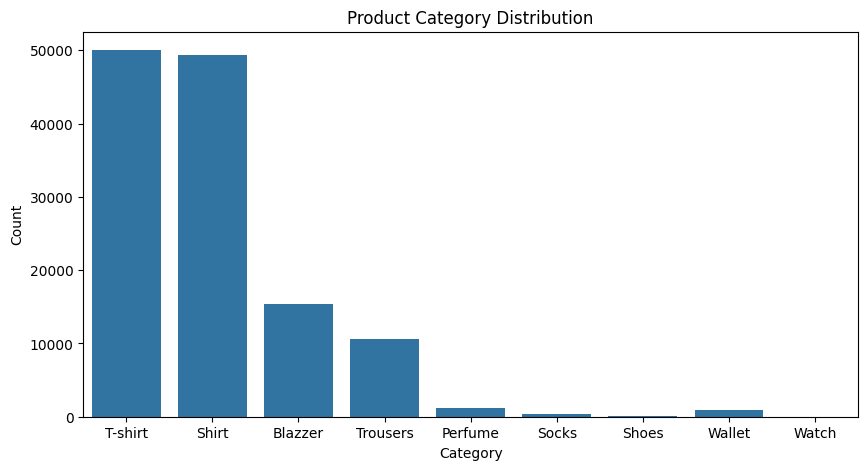

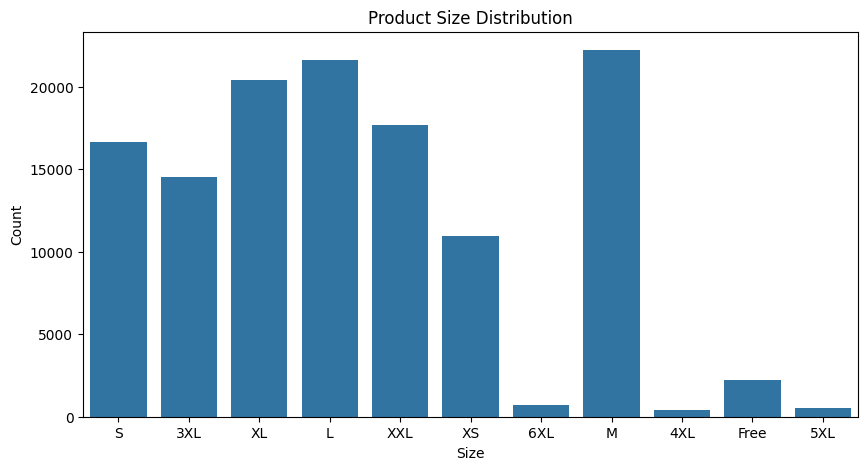

In [ ]:
# Distribution of product categories
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='Category')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Distribution of product sizes
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='Size')
plt.title('Product Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

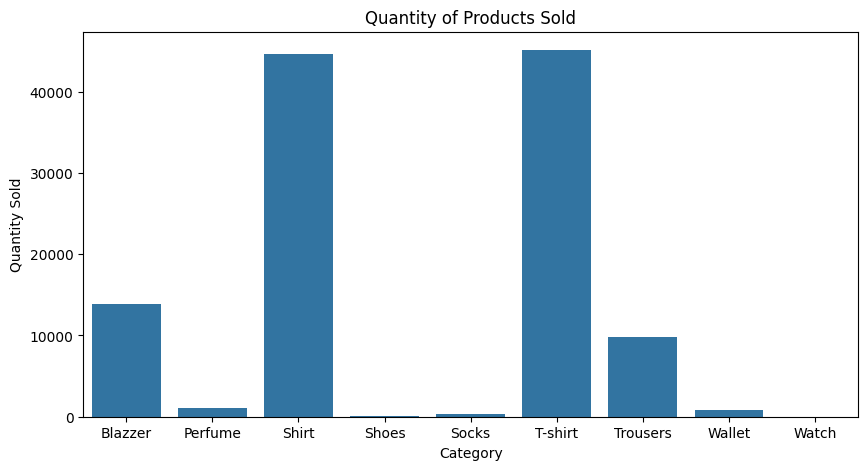

In [ ]:

# Quantity of products sold
product_sales = ds.groupby('Category')['Qty'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales, x='Category', y='Qty')
plt.title('Quantity of Products Sold')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.show()

Fulfillment Analysis

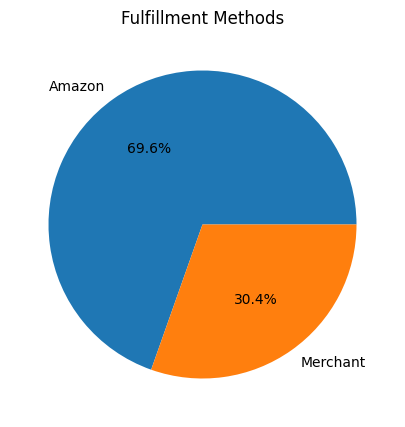

In [ ]:
# Fulfillment methods effectiveness
fulfillment_methods = ds['Fulfilment'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
fulfillment_methods.plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfillment Methods')
plt.ylabel('')
plt.show()

Customer Segmentation

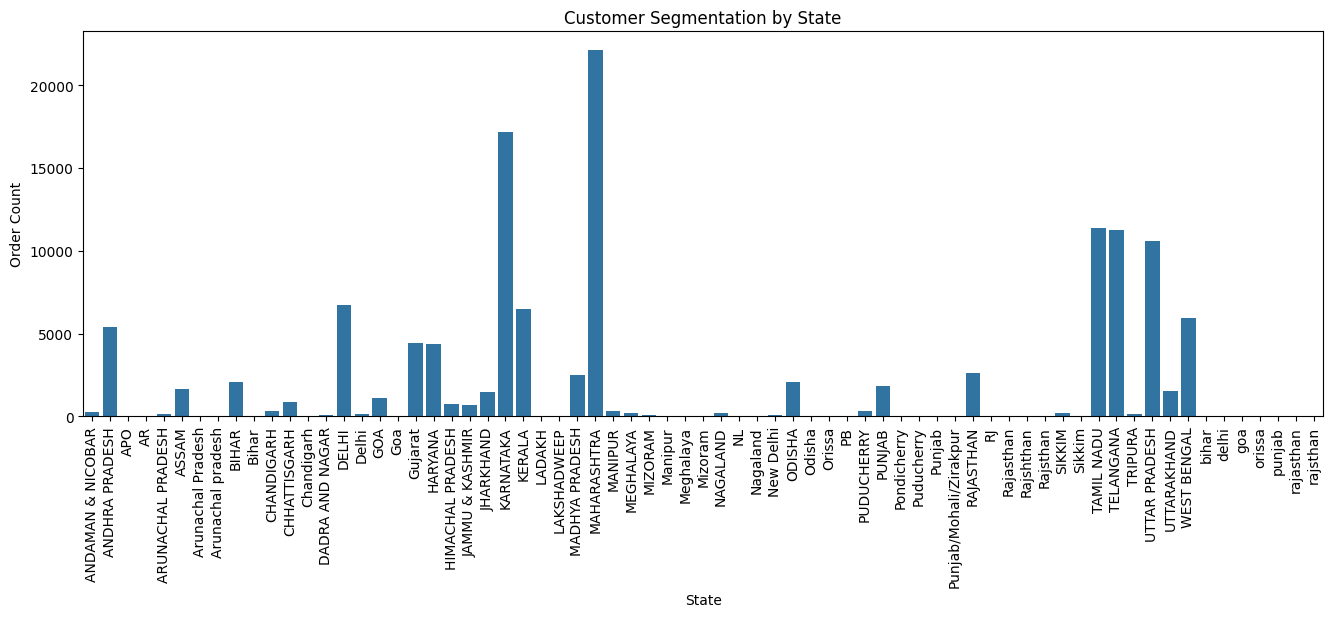

In [ ]:
# Segment customers by location
customer_segments = ds.groupby('ship-state')['Order ID'].count().reset_index()
customer_segments.columns = ['State', 'Order Count']

# Plot
plt.figure(figsize=(16, 5))
sns.barplot(data=customer_segments, x='State', y='Order Count')
plt.title('Customer Segmentation by State')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()


Geographical Analysis

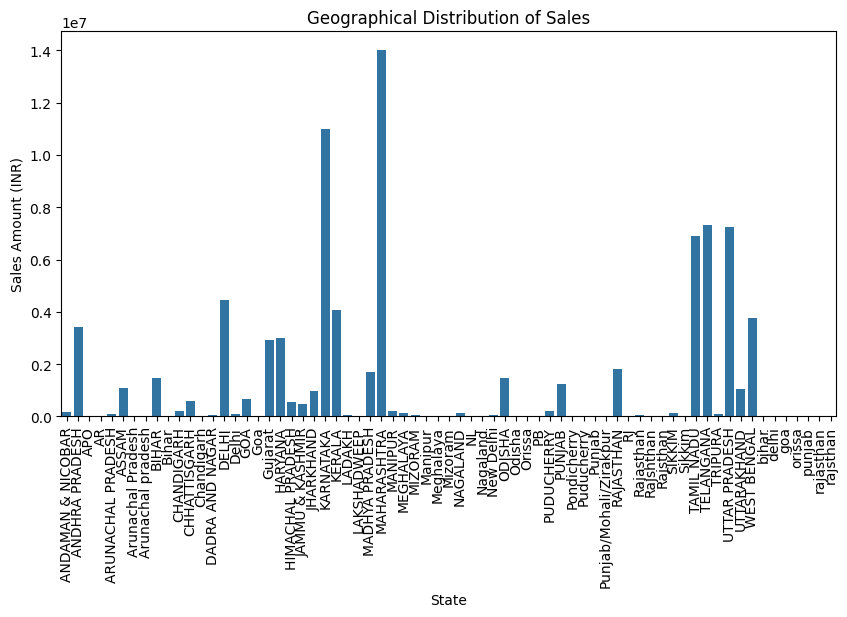

In [ ]:
# Geographical distribution of sales by state
geo_sales = ds.groupby('ship-state')['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=geo_sales, x='ship-state', y='Amount')
plt.title('Geographical Distribution of Sales')
plt.xlabel('State')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=90)
plt.show()

Data Loading and Overview:

Initial display of the dataset, showing columns such as Order ID, Date, Status, Fulfilment, Sales Channel, ship-service-level, Category, Size, Courier Status, currency, Amount, ship-city, ship-state, ship-postal-code, and ship-country.
Data Cleaning and Preprocessing:

Steps to clean and preprocess the data, likely involving handling missing values, data type conversions, and filtering relevant records.
Exploratory Data Analysis (EDA):

Visualizations and statistical summaries to understand the distribution of sales, popular product categories, shipping details, and other key metrics.
Sales Analysis:

Detailed analysis of sales performance, including trends over time, geographical analysis, and customer segmentation.
Insights and Recommendations:

Concluding insights derived from the analysis, potentially including recommendations for improving sales, optimizing shipping processes, and targeting specific customer segments.
Summary and Insights
Data Overview
The dataset contains detailed sales records from Amazon, including order details, shipment status, fulfillment type, sales channel, product category, size, shipping details, and monetary amounts.

Data Cleaning
The data was cleaned to ensure accuracy and consistency. This likely involved:

Handling missing values
Converting data types appropriately (e.g., dates, numerical values)
Filtering out irrelevant or erroneous records
Key Findings from EDA
Sales Trends:

Identification of peak sales periods, possibly correlating with holidays or promotional events.
Analysis of sales performance over time to identify growth or decline trends.
Product Categories:

Insights into the most popular product categories and sizes.
Analysis of sales distribution across different categories to identify best-sellers.
Shipping and Fulfillment:

Examination of shipping methods and their performance.
Analysis of fulfillment by Amazon vs. merchant fulfillment, with insights into delivery speed and customer satisfaction.
Geographical Analysis:

Sales distribution across different cities and states.
Identification of key markets and regions with high sales volumes.
Insights and Recommendations
Sales Optimization:

Leverage peak sales periods with targeted promotions and inventory planning.
Focus on best-selling categories and ensure adequate stock levels.
Shipping and Fulfillment:

Improve shipping times by optimizing fulfillment processes.
Consider expanding fulfillment by Amazon to leverage faster delivery options.
Customer Targeting:

Use geographical insights to tailor marketing campaigns to high-performing regions.
Develop strategies to boost sales in underperforming areas.
Product Strategy:

Diversify product offerings based on popular categories.
Monitor size trends to adjust inventory for popular sizes.
These insights can help optimize sales strategies, improve operational efficiency, and enhance customer satisfaction. For a more detailed analysis, we can further delve into specific sections of the notebook as needed